# Descriptives for GSS Reproducibility Project

Notes
--

- Command used to dump tables from lanl database on Rhodes to be put on OSDC:
        mysqldump -p -P3307 -u misha --socket=/mnt/ide1/mysql/var/mysql.sock1  lanl gss_question > gss_question.sql
        
# Tables

gss_corpus
--
This is the core table and contains information about all of the articles linked to GSS variables. Some of these are book chapters and things didn't have access to, but most we do. It also has variables that correspond to other datasets used.

Core variables:

- true_article_id
- author_[variables]
- title
- publication_title
- volume
- year_published
- file name (the PDF, html and/or texts associated with each of the articles examined as it exists in a file: gss_files) 
- 'doc_type',
- 'citation_type',
- 'author_1_prefix',
- 'author_1_last_name',
- 'author_1_first_name',
- 'author_1_middle_name',
 'author_1_suffix',
 'author_2_prefix',
 'author_2_first_name',
 'author_2_last_name',
 'author_2_middle_name',
 'author_2_suffix',
 'author_3_prefix',
 'author_3_first_name',
 'author_3_last_name',
 'author_3_middle_name',
 'author_3_suffix',
- 'title',
 'pages',
 'pub_id',
- 'publication_title',
 'publisher',
 'volume',
- 'year_published',
 'month_published',
 'publisher_country',
 'publisher_city',
 'state',
 'document_name',
 'conference',
 'editor_first_name',
 'editor_mi',
 'editor_last_name',
 'editor_2_first_name',
 'editor_2_mi',
 'editor_2_last_name',
- 'gss_years',
- 'other_datasets',
- 'abstract',
 'citation',
 'brief_type',
 'docket_number',
 'chapter_name',
 'edition',
 'isbn',
- 'variables',
 'report_no',
- 'file_name',
 'file_url',
 'file_id',
 'unique_pub_id',
 'round',
 'batch',
 'coder1',
 'coder2',
 'coder3',
 'coder4',
 'coder5',
 'coder6',
 'posterior_PaperCorrect',
 'posterior_Central',
 'posterior_Analysis',
 'posterior_Approach'

gss_variables
--
gss_variable_codes
--
These describe the variables (and all of the answers/codes associated with each questions and their individual meanings).

gss_variable_links
--
This links the articles in gss_corpus with the variables used within them.

Core variables:
		
- true_article_id
- variable

gss_question
--
These are responses to the survey about each article

gss_variable_ques
--
These are responses to the survey about each variable (in each article)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
from numpy import nan
import sys
sys.path.append('../')
import GSSUtility as GU
import seaborn as sns
import MySQLdb
from random import sample # numpy has its own np.random.sample which works differently and overwrites "random.sample"

In [13]:
%matplotlib inline

In [18]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': (1, 1, 1, 0),
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0,
 'font.family': 'sans-serif',
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '0.15',
 'grid.linestyle': '-.',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'pdf.fonttype': 42,
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0,
 'xtick.minor.size': 0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0,
 'ytick.minor.size': 0}

In [2]:
custom_style = {'axes.facecolor': 'white',
                'grid.color': '0.15',
                'grid.linestyle':'-.'}
sns.set_style("darkgrid", rc=custom_style)

In [7]:
# things moved to '  mysql -h 'klab.c3se0dtaabmj.us-west-2.rds.amazonaws.com'   -u mteplitskiy -p' per email with W. Catino 2015-02-09
db = MySQLdb.connect(host='klab.c3se0dtaabmj.us-west-2.rds.amazonaws.com', user='mteplitskiy', passwd="mteplitskiy", db="lanl")
c = db.cursor()


In [ ]:
c.execute('select gss_years, year_published from gss_corpus')
df = pd.DataFrame([el for el in c.fetchall()], columns=['gss_years_used', 'year_published'])

In [163]:
df.year_published[df.year_published == 0] = nan

In [165]:
df[df.year_published.notnull()].gss_years_used.value_counts()

              4172
1987           116
1991           108
1988           105
1990           105
1985           101
1977            73
1980            68
1973            63
 1972-1991      62
1993            62
1972            61
1994            57
 1972-77        56
1996            56
...
" 1973-5, 1983-5"                                               1
" ACT: The new rotation design of the GSS in 1988 revealed 12 order effects out of 500 variables.  Context effects probably occur every 40-60 questions, but more so within scaled questions which did not vary in order.  Questions prone to content effects h    1
" 1985, 1990-94"                                                1
 990-1996                                                       1
1972-80                                                         1
" ACT: In 1987, there was no evidence of a subtraction effect in the GSS items on marital and general happiness or between satisfaction if any.  In 1986 and 1987, the happiness of unmarr

According to he below, there seems to be a sizable number of articles published > 2005
--

In [87]:
df[df.year_published.notnull()].groupby('year_published').count().head()

AttributeError: 'DataFrame' object has no attribute 'year_published'

In [86]:
grouped = df[df.year_published.notnull()].groupby('year_published')
grouped.get_group(2004).head()

AttributeError: 'DataFrame' object has no attribute 'year_published'

# Number of variables over time

In [52]:
pathToData = '../../Data/'
dataCont = GU.dataContainer(pathToData)
    
articlesClasses = GU.filterArticles(dataCont.articleClasses, GSSYearsUsed=True)            

df = pd.DataFrame(columns=['aid', 'yearpublished', 'dvs', 'ivs', 'controls', 'total'])
for a in articleClasses:
    df.loc[a.articleID, :] = np.array([a.articleID, a.yearPublished, a.DVs, a.IVs, a.controls, 0], dtype=object)

df = df[df.yearpublished.notnull()]
df.yearpublished = df.yearpublished.astype(int)
df.aid = df.aid.astype(int)
df.index = df.aid
    
df.dvs = [len(v) for k, v in df.dvs.iteritems()]
df.ivs = [len(v) for k, v in df.ivs.iteritems()]
df.controls = [len(v) for k, v in df.controls.iteritems()]
df.total = df.dvs + df.ivs + df.controls

grouped = df.groupby('yearpublished')

# Number of articles per year in our data

Note: This is using articleClasses, which consists of only articles that survived a fair amount of filtering. 

(array([ 1970.,  1975.,  1980.,  1985.,  1990.,  1995.,  2000.,  2005.,
         2010.]), <a list of 9 Text xticklabel objects>)

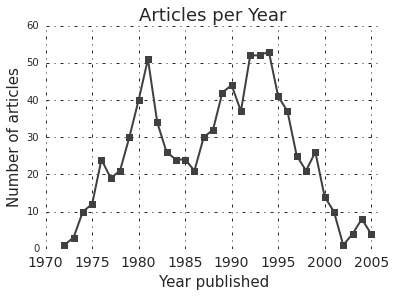

In [59]:
grouped['aid'].count().plot(style='s-', c='0.25', linewidth=2)
# legend(fontsize=15)
plt.xlim((1970, 2006))
plt.title('Articles per Year', fontsize=18)
plt.xlabel('Year published', fontsize=15)
plt.ylabel('Number of articles', fontsize=15)
plt.xticks(fontsize=14)
# savefig('../../images/9-4-2014--articles-per-year.jpg')

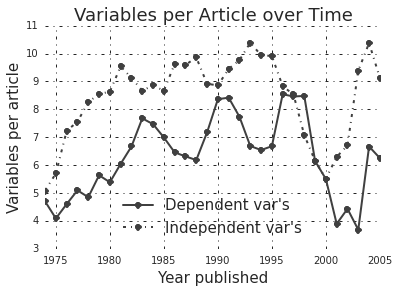

In [74]:
plt.figure(figsize=(6,4))
# grouped.mean()[['dvs', 'ivs', 'controls', 'total']].plot()
means = grouped.mean()
ses = pd.rolling_std(grouped.sum(), window=3, axis=0)

# figsize(())
pd.rolling_mean(means.dvs, window=3).plot(label="Dependent var's", linewidth=2, style='o-', c='0.25') 
pd.rolling_mean(means.ivs, window=3).plot( label="Independent var's", linewidth=2, style='o-.', c='0.25')
# plot(means.index, means['total'], '--', linewidth=1, label="All var's")
plt.legend(fontsize=15, loc='best')
plt.xlim((1974, 2005))
plt.title('Variables per Article over Time', fontsize=18)
plt.xlabel('Year published', fontsize=15)
plt.ylabel('Variables per article', fontsize=15)
# plt.savefig('../../images/variables_per_article_over_time.jpg')

(0, 4600)

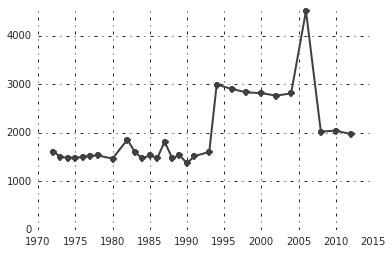

In [101]:
years = np.unique(dataCont.df.index)
sample_sizes = [np.sum(dataCont.df.index==year) for year in years]
plt.plot(years, sample_sizes, 'o-', color='0.25', linewidth=2)
plt.ylim(0,4600)

#Descriptives of Model Outcomes

In [8]:
if __name__ == "__main__":    
    
    pathToData = '../../Data/'
    dataCont = GU.dataContainer(pathToData)
    
    articlesToUse = GU.filterArticles(dataCont.articleClasses, GSSYearsUsed=True)            
    print 'len of articleClasses:', len(articlesToUse)
#     raw_input('...')
    
    # define the storage containers for outputs
    outcomes = ['propSig', 'paramSizesNormed', 'Rs', 'adjRs', 'pvalues',  'numTotal', \
                'propSig_CentralVars', 'paramSizesNormed_CentralVars', 'pvalues_CentralVars']
    output = {outcome:[] for outcome in outcomes}
    output['article_id'] = []
    
           
#     for article in sample(articlesToUse, 100):
    for article in articlesToUse:
    #for article in [a for a in articlesToUse if a.articleID == 6755]:
   
        print 'Processing article:', article.articleID
        RHS = article.IVs + article.controls     
        
        for DV in article.DVs:

            for year in article.GSSYearsUsed:
                
                results = GU.runModel(dataCont, year, DV, RHS) # models run on max year of data used
                if not results: continue

                centralVars = []            
                for civ in article.centralIVs:
                    if 'standardize(%s, ddof=1)' % (civ) in results.params.index:
                        centralVars.append('standardize(%s, ddof=1)' % (civ))
                    else: 
                        for col in results.params.index:
                            if 'C(' + civ + ')' in col:
                                centralVars.append(col)


                # The reasoning for the condition below is that authors make two types of arguments for "central" variables, 
                # (1) that the central variable is really important, p < 0.05, or (2) that the central variable is not important (p > 0.05). 
                # What we want to test by replacing the variable with a cognate are arguments of type (1). 
                # Arguments of type (2) are important and testable too, but if we test all of these together, we will obscure both effects.
                # So the condition below ensures that at least one of the central variables was found to be "important" in the original 
                # article.
                # This throws away 67 observations.
#                 if np.all(results.pvalues[centralVars] > 0.05): 
#                     print 'All "central" IVs are p > 0.05. Skipping.'
#                     continue


                output['Rs'].append(results.rsquared) 
                output['adjRs'].append(results.rsquared_adj) 
                output['propSig'].append(float(len([p for p in results.pvalues[1:] if p < 0.05]))/len(results.params[1:])) 
                output['paramSizesNormed'].append(np.mean(results.params[1:].abs())) 
                output['pvalues'].append(np.mean( results.pvalues[1:]))
                output['numTotal'].append( 1 ) #divide by len of R^2 array to get a mean of variables estimated PER model                           
                if centralVars:
                    output['pvalues_CentralVars'].append(np.mean(results.pvalues[centralVars]))               
                    output['propSig_CentralVars'].append(float(len([p for p in results.pvalues[centralVars] if p < 0.05])) \
                                                            /len(results.params[centralVars])) 
                    output['paramSizesNormed_CentralVars'].append(np.mean(results.params[centralVars].abs()))                    
                else: 
                    output['pvalues_CentralVars'].append(nan)
                    output['propSig_CentralVars'].append(nan)
                    output['paramSizesNormed_CentralVars'].append(nan)
                    
                output['article_id'].append(article.articleID) 

len of articleClasses: 728
Processing article: 1
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
no central variables
Processing article: 9
IV OCC is of type "DONOTUSE"
IV WRKSTAT is of type "DONOTUSE"
Dropping column MARITAL because it is constant
IV OCC is of type "DONOTUSE"
IV WRKSTAT is of type "DONOTUSE"
IV OCC is of type "DONOTUSE"
IV WRKSTAT is of type "DONOTUSE"
Dropping column MARITAL because it is constant
IV OCC is of type "DONOTUSE"
IV WRKSTAT is of type "DONOTUSE"
IV OCC is of type "DONOTUSE"
IV WRKSTAT is of type "DONOTUSE"
Dropping column MARITAL because it is constant
IV OCC is of type "DONOTUSE"
IV WRKSTAT is of type "DONOTUSE"
IV OCC is of type "DONOTUSE"
IV WRKSTAT is of type "DONOTUSE"
Dropping column MARITAL because it is c

KeyboardInterrupt: 

#Create dataframe to store *output*

In [76]:
df_output = pd.DataFrame(output, index=output['article_id'])
del df_output['numTotal']
print len(df_output)
print len(set(df_output.index))

4737
316


#Plot outcome distributions

RsMean: 0.081, s.d.: 0.080
adjRsMean: 0.073, s.d.: 0.078
paramSizesNormedMean: 0.170, s.d.: 0.126
paramSizesNormed_CentralVarsMean: 0.161, s.d.: 0.122
propSigMean: 0.399, s.d.: 0.264
propSig_CentralVarsMean: 0.401, s.d.: 0.302
pvaluesMean: 0.282, s.d.: 0.166
pvalues_CentralVarsMean: 0.279, s.d.: 0.186


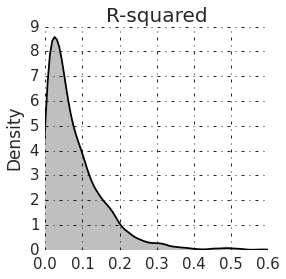

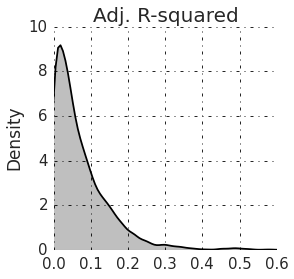

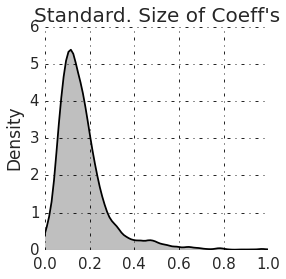

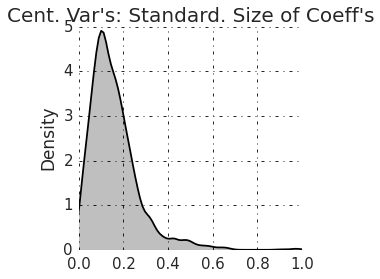

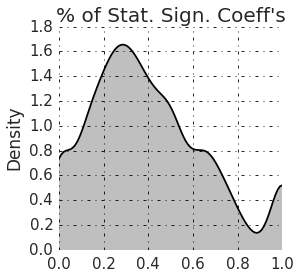

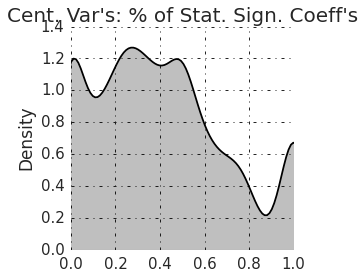

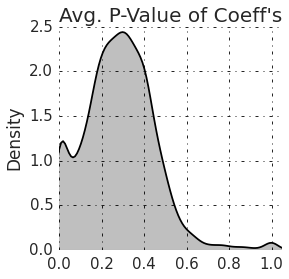

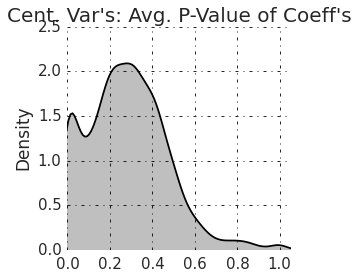

In [79]:
outcomeMap = {'propSig':"% of Stat. Sign. Coeff's", 
              'paramSizesNormed':"Standard. Size of Coeff's",
              'Rs':'R-squared', 
              'adjRs':'Adj. R-squared',
              'pvalues':"Avg. P-Value of Coeff's",
              'propSig_CentralVars':"Cent. Var's: % of Stat. Sign. Coeff's",
              'paramSizesNormed_CentralVars':"Cent. Var's: Standard. Size of Coeff's", 
              'pvalues_CentralVars':"Cent. Var's: Avg. P-Value of Coeff's"}

for outcome in df_output.columns:
    if outcome=='article_id': continue
    plt.figure(figsize=(4,4))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('Density', fontsize=17)


    plt.title(outcomeMap[outcome], fontsize=20)
    print outcome + 'Mean: %0.3f, s.d.: %0.3f' % (df_output[outcome].mean(), df_output[outcome].std())

    sns.kdeplot(df_output[outcome].dropna(), shade=True, color='black', legend=False)
#     sns.kdeplot(df2_output[outcome].dropna(), shade=False, color='blue', legend=False)

    if '%' in outcomeMap[outcome] or 'P-value' in outcomeMap[outcome] or 'Size' in outcomeMap[outcome]:
        plt.xlim((0,1))
    elif 'R-' in outcomeMap[outcome]:
        plt.xlim(0,0.6)
    else:
        plt.xlim(0, 1.05*df_output[outcome].max())
    #     df_output[outcome].dropna().plot(kind='kde', color='black', linewidth=3)

#     df_output[outcome].hist(bins=30)
#     savefig('../../Images/descriptives--' + outcome + '.svg', bbox_inches='tight')